# 📘 Fractals – Mathematical Theory and Numerical Methods

---

## 1. Introduction
Fractals are geometric objects that exhibit complex structure **at every scale**. Unlike traditional geometric figures such as lines, circles or cubes, fractals often possess the following properties:

- **Self-similarity**: Parts of the object resemble the whole, either exactly or statistically.
- **Infinite detail**: Zooming in reveals ever more complexity.
- **Non-integer dimension**: Fractals often occupy a fractional dimension, lying between traditional geometric dimensions.
- **Recursive or iterative definition**: Many fractals can be constructed through a simple, repeating rule.

---

### Motivation

Fractals appear in both **pure mathematics** and **real-world phenomena**:

- Natural structures like coastlines, snowflakes, trees, clouds, lightning, blood vessels
- Computer graphics and procedural textures
- Signal processing and chaotic systems
- Complex dynamics in the complex plane (Mandelbrot & Julia sets)

---

### A departure from classical geometry

Classical geometry assumes that objects are composed of smooth curves, well-defined shapes, and integer dimensions.

Fractals break these expectations:

- **Infinite perimeter, finite area**:  
  The Koch snowflake has a boundary that grows endlessly with each iteration,  
  yet the enclosed area converges to a finite value.

- **Totally disconnected, yet uncountably infinite**:  
  The Cantor set contains no continuous intervals, only isolated points,  
  but still has the same cardinality as the entire real interval [0,1].

- **Irrational dimension**:  
  Fractals like the Cantor set or the Koch curve have a dimension that is  
  non-integer and often irrational, such as:

  $$
  D = \frac{\log 2}{\log 3} \approx 0.6309
  $$

---

In this notebook, we explore **both the mathematical theory** behind fractals and **numerical methods** for constructing and analyzing them.

We begin by understanding what it means to be "self-similar" and how fractals can be rigorously described.

## 2. Self-Similarity

One of the fundamental characteristics of fractals is **self-similarity**:  
the property that a structure looks similar to a part of itself, often at multiple scales.

But what exactly does that mean — and how can we define it mathematically?

---

### 2.1 Exact Self-Similarity

A set $ F \subseteq \mathbb{R}^n $ is called **exactly self-similar** if it can be written as a union of scaled-down copies of itself:

$$
F = \bigcup_{i=1}^N S_i(F)
$$

where each $ S_i $ is a **contractive mapping**, often of the form:

$$
S_i(x) = r_i \cdot x + t_i
$$

with $ 0 < r_i < 1 $ and $ t_i \in \mathbb{R}^n $ a translation vector.

This means:  
The whole set $ F $ consists of $ N $ smaller copies of itself, each scaled by a factor $ r_i $, and placed at different positions $ t_i $.

---

### 2.2 Iterated Function Systems (IFS)

Self-similar fractals can often be constructed by an **iterated function system**:  
a finite set of contraction mappings $ \{ S_1, ..., S_N \} $.

There exists a unique compact set $ F \subseteq \mathbb{R}^n $ such that:

$$
F = \bigcup_{i=1}^N S_i(F)
$$

This is guaranteed by the **Banach Fixed Point Theorem**:  
in a complete metric space, a system of contractions has a unique non-empty compact fixed point.

Such $ F $ is called the **attractor** of the IFS.

---

### 2.3 Examples

- **Cantor set**: composed of 2 copies, each scaled by $ \frac{1}{3} $
- **Sierpinski triangle**: composed of 3 copies, each scaled by $ \frac{1}{2} $
- **Koch curve**: composed of 4 copies, each scaled by $ \frac{1}{3} $

---

### 2.4 Exact vs. Statistical Self-Similarity

- **Exact**: The smaller parts are geometrically identical to the whole  
  (e.g., Sierpinski triangle)

- **Statistical**: Only the statistical structure is preserved  
  (e.g., natural fractals like coastlines, tree branches)

---

### 2.5 Why Self-Similarity Matters

Self-similarity is not just a curiosity — it explains:

- How fractals can be **defined recursively**
- Why they often exhibit **non-integer dimensions**
- Why they can be **represented algorithmically**

## 3. Koch Curve – Recursive Construction and Fractal Geometry

The **Koch curve** is a classical fractal constructed by recursively replacing line segments with a specific geometric pattern.

---

### 3.1 Geometric Construction

1. Start with a line segment of unit length.
2. Divide it into 3 equal parts.
3. Replace the middle third with two sides of an equilateral triangle (pointing outward).
4. Repeat the process recursively for each new segment.

After each iteration:
- The number of segments increases by a factor of 4
- Each segment becomes 1/3 the length of the previous

---

### 3.2 Recursive Definition

Let $L_0$ be the initial segment.  
At iteration step $n$, the curve consists of:

- $N_n = 4^n$ segments
- Each of length $\ell_n = \left(\frac{1}{3}\right)^n$

So the total length after $n$ steps is:

$$
L_n = N_n \cdot \ell_n = 4^n \cdot \left(\frac{1}{3}\right)^n = \left( \frac{4}{3} \right)^n \to \infty
$$

$\Rightarrow$ The curve has **infinite length**, but remains within a **bounded area**.

---

### 3.3 Fractal Dimension

We can compute the **similarity dimension** $D$ using the relation:

$$
N = r^{-D} \quad \Rightarrow \quad D = \frac{\log N}{\log (1/r)}
$$

For the Koch curve:
- $N = 4$ self-similar parts
- Each scaled by $r = 1/3$

Therefore:

$$
D = \frac{\log 4}{\log 3} \approx 1.2619
$$

This means the Koch curve is **more complex than a line (1D)**  
but does **not fill an area (2D)**.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider

def koch_curve(p1, p2, depth):
    if depth == 0:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='blue')
        return

    # Berechne die Teilpunkte
    x1, y1 = p1
    x5, y5 = p2

    dx = (x5 - x1) / 3
    dy = (y5 - y1) / 3

    x2, y2 = x1 + dx, y1 + dy
    x3 = (x1 + x5) / 2 + np.sqrt(3) * (y1 - y5) / 6, (y1 + y5) / 2 + np.sqrt(3) * (x5 - x1) / 6
    x4, y4 = x1 + 2 * dx, y1 + 2 * dy

    # Rekursion auf die 4 neuen Segmente
    koch_curve((x1, y1), (x2, y2), depth - 1)
    koch_curve((x2, y2), x3, depth - 1)
    koch_curve(x3, (x4, y4), depth - 1)
    koch_curve((x4, y4), (x5, y5), depth - 1)

# Interaktive Visualisierung
def plot_koch(depth):
    plt.figure(figsize=(10, 3))
    koch_curve((0, 0), (1, 0), depth)
    plt.axis('equal')
    plt.axis('off')
    plt.title(f"Koch Curve (depth = {depth})")
    plt.show()

interact(plot_koch, depth=IntSlider(min=0, max=7, step=1, value=2));

interactive(children=(IntSlider(value=2, description='depth', max=7), Output()), _dom_classes=('widget-interac…

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider

def koch_snowflake_edge(p1, p2, depth):
    if depth == 0:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='darkorange')
        return

    # Berechne die Teilpunkte
    x1, y1 = p1
    x5, y5 = p2

    dx = (x5 - x1) / 3
    dy = (y5 - y1) / 3

    x2, y2 = x1 + dx, y1 + dy
    x3 = (x1 + x5) / 2 + np.sqrt(3) * (y1 - y5) / 6, (y1 + y5) / 2 + np.sqrt(3) * (x5 - x1) / 6
    x4, y4 = x1 + 2 * dx, y1 + 2 * dy

    # Rekursiv zeichnen
    koch_snowflake_edge((x1, y1), (x2, y2), depth - 1)
    koch_snowflake_edge((x2, y2), x3, depth - 1)
    koch_snowflake_edge(x3, (x4, y4), depth - 1)
    koch_snowflake_edge((x4, y4), (x5, y5), depth - 1)

def plot_koch_snowflake_full(depth):
    plt.figure(figsize=(6, 6))

    # Erzeuge gleichseitiges Dreieck
    angles = np.deg2rad([0, 120, 240])
    base_points = [(np.cos(a), np.sin(a)) for a in angles]
    base_points.append(base_points[0])  # zum Schließen

    # Zeichne jede Seite mit eigener Koch-Funktion
    for i in range(3):
        koch_snowflake_edge(base_points[i], base_points[i+1], depth)

    plt.title(f"Koch Snowflake (closed triangle, depth = {depth})")
    plt.axis('equal')
    plt.axis('off')
    plt.show()

# Interaktiver Slider
interact(plot_koch_snowflake_full, depth=IntSlider(min=0, max=7, step=1, value=2));

interactive(children=(IntSlider(value=2, description='depth', max=7), Output()), _dom_classes=('widget-interac…

### 3.4 Analytical Properties of the Koch Curve

Let us denote:

- $n$ = number of iterations (recursion depth)
- $N_n$ = number of segments at iteration $n$
- $\ell_n$ = length of each segment at iteration $n$
- $L_n$ = total length of the curve at iteration $n$

---

#### 1. Number of segments

At each step, every line segment is replaced by **4 new segments**:

$$
N_n = 4^n
$$

---

#### 2. Length of each segment

Each new segment is exactly **one third** the length of the previous:

$$
\ell_n = \left(\frac{1}{3}\right)^n
$$

---

#### 3. Total length of the curve

Total length after $n$ steps:

$$
L_n = N_n \cdot \ell_n = 4^n \cdot \left( \frac{1}{3} \right)^n = \left( \frac{4}{3} \right)^n
$$

This means:

- The total length **increases exponentially**
- $\lim\limits_{n \to \infty} L_n = \infty$

So, the Koch curve has **infinite length**, even though it is contained within a **finite region** of the plane.

---

#### 4. Fractal Dimension (Similarity Dimension)

We use the formula for self-similar objects:

$$
D = \frac{\log N}{\log (1/r)}
$$

Where:

- $N = 4$ parts
- $r = 1/3$ scaling factor

So:

$$
D = \frac{\log 4}{\log 3} \approx 1.2619
$$

This dimension lies strictly between 1 and 2.  
It is **not enough to describe the curve as a line**, but it also **does not fill an area**.

### 3.5 Why the Koch Curve is not a "Line" in the Classical Sense

At first glance, the Koch curve appears to be just a jagged line.  
It is **continuous**, and you can trace it from start to end without lifting your pen.

However, mathematically it behaves **very differently** from a normal line segment:

---

#### 1. Infinite Length

The length of the curve increases with each iteration as:

$$
L_n = \left( \frac{4}{3} \right)^n
$$

Thus:

$$
\lim_{n \to \infty} L_n = \infty
$$

Despite being contained in a finite region, the curve has **infinite perimeter**.

---

#### 2. No Tangents

The curve becomes **infinitely "kinked"**, with new corners introduced at every scale.

This means:

- The curve is **nowhere differentiable**
- There is **no well-defined slope** at any point

---

#### 3. Fractal Dimension

The Koch curve has a **fractal dimension** of:

$$
D = \frac{\log 4}{\log 3} \approx 1.2619
$$

This value is **strictly between 1 and 2**:

- Greater than 1: because the curve is too "dense" to be a smooth 1D line  
- Less than 2: because it does not cover any area

---

#### 4. Topological vs. Geometric View

- **Topologically**: it is a curve (connected, continuous)
- **Geometrically**: it behaves like a "line with infinite detail"

This is what makes it a **fractal**:  
It defies classical geometric expectations while remaining mathematically well-defined.

,Iteration n,Total length Lₙ
0,0,1.000000
1,1,1.333333
2,2,1.777778
3,3,2.370370
4,4,3.160494
5,5,4.213992
6,6,5.618656
7,7,7.491541
8,8,9.988721
9,9,13.318295


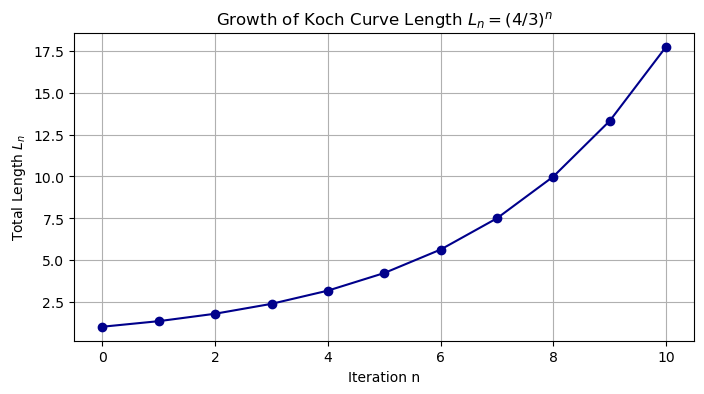

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Iterationsstufen
n_values = np.arange(0, 11)
L_values = (4/3) ** n_values  # L_n = (4/3)^n

# Tabelle anzeigen
length_df = pd.DataFrame({
    "Iteration n": n_values,
    "Total length Lₙ": L_values
})
display(length_df)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(n_values, L_values, marker='o', linestyle='-', color='darkblue')
plt.title("Growth of Koch Curve Length $L_n = (4/3)^n$")
plt.xlabel("Iteration n")
plt.ylabel("Total Length $L_n$")
plt.grid(True)
plt.show()